In [5]:
import pandas as pd
import numpy as np

In [6]:
train=pd.read_csv('insurance.csv')

In [7]:
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
def gender(x):
    if x=='male':
        return 1
    elif x=='female':
        return 0

In [10]:
train['gender']=train['sex'].apply(gender)

In [11]:
def smok(x):
    if x=='yes':
        return 1
    elif x=='no':
        return 0

In [12]:
train['smok']=train['smoker'].apply(smok)

In [13]:
train.head()

,age,sex,bmi,children,smoker,region,charges,gender,smok
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

D:\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\New folder\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


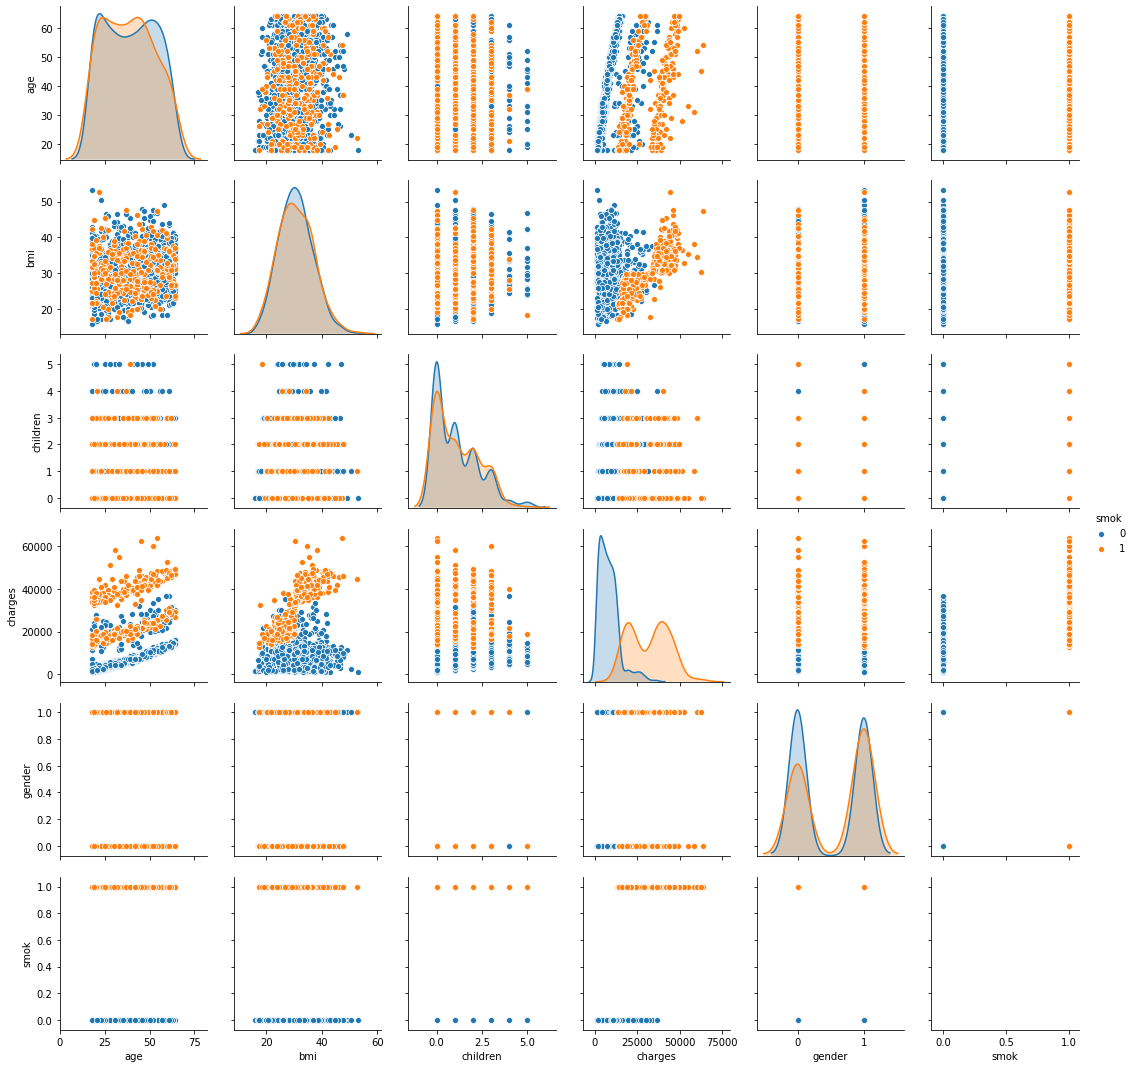

In [15]:
sns.pairplot(train,hue='smok')

In [16]:
plt.show()

In [17]:
df=train[train['smok']==1]

[]

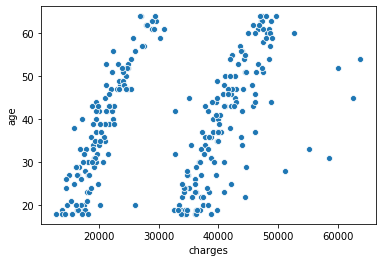

In [19]:
sns.scatterplot(x='charges',y='age',data=df)
plt.plot()

In [20]:
train.bmi

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [22]:
train['bmi']=train.bmi.apply(lambda x:1 if x<=30 else 0)

In [23]:
train.head()

,age,sex,bmi,children,smoker,region,charges,gender,smok
0,19,female,1,0,yes,southwest,16884.92400,0,1
1,18,male,1,1,no,southeast,1725.55230,1,0
2,28,male,1,3,no,southeast,4449.46200,1,0
3,33,male,1,0,no,northwest,21984.47061,1,0
4,32,male,1,0,no,northwest,3866.85520,1,0


Text(0.5, 1.0, 'Smoker\'s "Age vs Charges"')

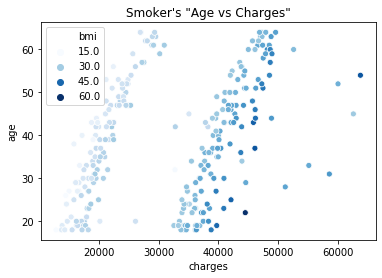

In [24]:

sns.scatterplot(x='charges', y='age', data=df, color="Red", hue='bmi', palette='Blues')
plt.title('Smoker\'s "Age vs Charges"')

In [25]:
from sklearn.model_selection import train_test_split
y= df['charges']
X= df[['age', 'bmi', 'children']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Text(0, 0.5, 'Predicted Y')

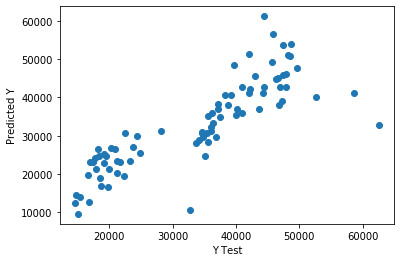

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 test_data', r2_score(y_test, predictions))

MAE: 4815.457206702667
MSE: 45930812.574844055
RMSE: 6777.22749912116
R2 test_data 0.6874285639656135


In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators =100, criterion = 'mse',random_state = 42,n_jobs = -1)
rfr.fit(X_train,y_train)
rfr_pred_train = rfr.predict(X_train)
rfr_pred_test = rfr.predict(X_test)


print('MSE train_data: ', round((mean_squared_error(y_train,rfr_pred_train)), 1))
print('MSE test_data: ', round(mean_squared_error(y_test,rfr_pred_test), 1))
print('R2 train_data: ',round(r2_score(y_train,rfr_pred_train), 2))
print('R2 test_data: ', round(r2_score(y_test,rfr_pred_test), 2))

MSE train_data:  2330187.0
MSE test_data:  19709500.4
R2 train_data:  0.98
R2 test_data:  0.87
